training score : 0.974 (ovr)
-8.912236877141495
9.305523686414913
(508, 911)


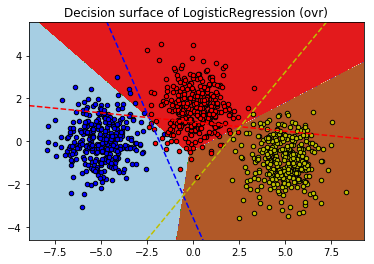

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)

for multi_class in (['ovr']):
    clf = LogisticRegression(solver='liblinear', max_iter=100, random_state=42,
                             multi_class=multi_class).fit(X, y)

    # print the training scores
    print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))

    # create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    print(x_min)
    print(x_max)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    print(xx.shape)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis('tight')

    # Plot also the training points
    colors = "bry"
    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,
                    edgecolor='black', s=20)

    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = clf.coef_
    intercept = clf.intercept_

    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
        plt.plot([xmin, xmax], [line(xmin), line(xmax)],
                 ls="--", color=color)

    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

plt.show()

In [3]:
import networkx as nx
# Create a graph
G = nx.fast_gnp_random_graph(n=100, p=0.5)
print("Number of nodes: ", G.number_of_nodes())
print("Number of edges: ", G.number_of_edges())
print(G.nodes()[:5])
print(G.edges()[:5])
print(G.neighbors(0))

Number of nodes:  100
Number of edges:  2531
[0, 1, 2, 3, 4]
[(0, 4), (0, 8), (0, 11), (0, 12), (0, 14)]
[4, 8, 11, 12, 14, 15, 17, 18, 20, 21, 24, 30, 34, 35, 36, 38, 40, 44, 45, 46, 48, 49, 50, 51, 52, 53, 55, 59, 60, 62, 64, 66, 67, 68, 69, 70, 71, 74, 75, 76, 77, 78, 79, 80, 81, 83, 86, 87, 88, 94, 95, 96, 98, 99]


In [3]:
import random
the_list = [1,2,3,4,5,6,7,8,9,10,11,12,15]
test = random.sample(the_list, 5)
remain = the_list-test
print(test)
print(the_list)
print(remain)


TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [ ]:
import pickle
import os
def dummy(doc):
    return doc
Dataset = "pubmed"

In [ ]:
modelSaveDir = "../Data/"+Dataset+"/models/tf/textual_sample=140k/"
with open(modelSaveDir+'tf_features.pickle', "rb") as input_file:
    vec = pickle.load(input_file)
with open(modelSaveDir+'feature_pid.pickle', "rb") as input_file:
    allPaperid = pickle.load(input_file)
print(vec.shape)
print(len(allPaperid))

In [ ]:
print(vec[0].nonzero())

In [ ]:
print(dir(vec))

In [ ]:
import numpy as np
allPaperid = np.asarray(allPaperid)
result = textual_emb = np.column_stack([allPaperid, vec])
print(result.shape)

In [ ]:
print(result[0])

In [ ]:
import com_func
# examples
collection = []
sentences = ['this is a the First sentence for first    .'," ","51152123asdfasd",
             'and the final sentencesssssssssssssssddddddddddddddddddddddddsssssssssssssssssssssssss!'
            , "cross-protection$$hemagglutination "]
counter = 5
for line in sentences:
    newPaper = {"cleaned_content":com_func.clean_line_of_raw(line, stopword = False, word_min_length=2)}
    collection.append(newPaper)
    counter+=1
print(collection)
allContent = [paper["cleaned_content"]for paper in collection]

# test = model.transform(allContent)
# print(test.shape)

In [ ]:
# calculate tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
# tf = sublinear tf, 1+log(tf) if tf >0, or 0. idf = (log(1+N)/df(t,d,C)) + 1
# df(d,t,C) means number of document d contain term t in collection C
# Each row is normalized to have unit Euclidean norm 
# reference to http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction
tfidf_vectorizer = TfidfVectorizer(use_idf=False, smooth_idf=False, sublinear_tf=True, norm="l2", min_df=0,
                                   analyzer='word', tokenizer=dummy,preprocessor=dummy, stop_words = None)
allContent = [paper["cleaned_content"]for paper in collection]
print(allContent)
tfidf_matrix = tfidf_vectorizer.fit_transform(allContent)
testpid = [3,1,4,2]
print(testpid)
print(len(tfidf_vectorizer.vocabulary_))
print(tfidf_vectorizer.get_feature_names())
print(tfidf_matrix.shape)
print(tfidf_matrix)
print(tfidf_matrix.toarray())

In [ ]:
print(dir(tfidfresult))

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100)
final_lsa_Matrix = svd.fit_transform(test)
print(test.shape)

In [ ]:
print(final_lsa_Matrix)
print(svd.explained_variance_ratio_.sum())

In [ ]:
import numpy as np
def remove_zero_feature(Xtr, min_tfidf=0.04):
    D = Xtr.toarray() # convert to dense if you want
    tfidf_means = np.mean(D, axis=0) # find features that are 0 in all documents
    D = np.delete(D, np.where(tfidf_means == 0)[0], axis=1) # delete them from the matrix
    return D

In [ ]:
test2 = remove_zero_feature(test)
print(test2.shape)

In [ ]:
import com_func
# examples
collection = []
sentences = ['this is a the First sentence for first    .'," ","51152123asdfasd",
             'and the final sentencesssssssssssssssddddddddddddddddddddddddsssssssssssssssssssssssss!']
collection, rowSize = com_func.clean_batch_of_raw(sentences, stopword = False, word_min_length=2)
print(collection)
print(rowSize)

In [ ]:
from gensim import corpora
import pickle
modelSaveDir = "../Data/"+Dataset+"/models/count/textual_sample=140k/"
embedding = corpora.MmCorpus(os.path.join(modelSaveDir, 'tf_vector.mm'))
with open(modelSaveDir+'emb_pid.pickle', "rb") as input_file:
    index = pickle.load(input_file)

print(len(index))
print(len(embedding))

In [ ]:
import com_func
# examples
collection = []
sentences = ['this is a the First sentence for first    .'," ","51152123asdfasd",
             'and the final sentencesssssssssssssssddddddddddddddddddddddddsssssssssssssssssssssssss!'
            , "cross-protection$$hemagglutination "]
counter = 5
for line in sentences:
    newPaper = {"cleaned_content":com_func.clean_line_of_raw(line, stopword = False, word_min_length=2)}
    collection.append(newPaper)
    counter+=1
print(collection)

In [ ]:
collection[0].items()

In [ ]:
# convert raw text to numerical feature vectors
# unigram are used
import gensim
from gensim import corpora
dictionary = corpora.Dictionary(allContent)
corpus = [dictionary.doc2bow(text) for text in allContent]
print(corpus)
doc_emb = gensim.matutils.corpus2csc(corpus)
print(doc_emb.T.toarray())
tf = gensim.models.TfidfModel(corpus, smartirs="lnn")
tfidfresult = tf[corpus]
tfidf_emb = gensim.matutils.corpus2csc(tfidfresult)
print(tfidf_emb.T.toarray())

In [ ]:
# convert raw text to numerical feature vectors
# bow(Bags of words) are used
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(min_df = 0,analyzer='word', tokenizer=dummy,preprocessor=dummy, stop_words = None)
# train a dictionary to build a frquence counter
allContent = [paper["cleaned_content"]for paper in collection]
print(allContent)
count_matrix = count_vect.fit_transform(allContent)
print(len(count_vect.vocabulary_))
print(count_vect.get_feature_names())
print(count_matrix.toarray())
print(count_matrix.shape)
test = count_vect.fit_transform(allContent).todense()
print(test)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
result = scaler.fit_transform(count_matrix.toarray())
print(scaler.mean_)
print(scaler.var_ )
print(result)

In [ ]:
# test save model
import pickle

pickle.dump(count_vect, open("../tests/CountVectorizer.pickle", "wb"))
pickle.dump(count_matrix, open("../tests/trained_features.pickle", "wb"))

In [ ]:
# calculate tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
# tf = sublinear tf, 1+log(tf) if tf >0, or 0. idf = (log(1+N)/df(t,d,C)) + 1
# df(d,t,C) means number of document d contain term t in collection C
# Each row is normalized to have unit Euclidean norm 
# reference to http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction
tfidf_vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=True, sublinear_tf=True, norm=None, min_df=0,
                                   analyzer='word', tokenizer=dummy,preprocessor=dummy, stop_words = None)
allContent = [paper["cleaned_content"]for paper in collection]
print(allContent)
tfidf_matrix = tfidf_vectorizer.fit_transform(allContent)
testpid = [3,1,4,2]
print(testpid)
print(len(tfidf_vectorizer.vocabulary_))
print(tfidf_vectorizer.get_feature_names())
print(tfidf_matrix.shape)
print(tfidf_matrix)
print(tfidf_matrix.toarray())

In [ ]:
# test save model

pickle.dump(tfidf_vectorizer, open("../tests/tfidf.pickle", "wb"))
pickle.dump(tfidf_matrix, open("../tests/trained_features.pickle", "wb"))
pickle.dump(testpid, open("../tests/index.pickle", "wb"))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
# using tf-idf + SVD as LSA
tfidf_vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=True, sublinear_tf=True, norm=None, min_df=0,
                                   analyzer='word', tokenizer=dummy,preprocessor=dummy, stop_words = None)
allContent = [paper["cleaned_content"]for paper in collection]
print(allContent)
tfidf_matrix = tfidf_vectorizer.fit_transform(allContent)
testpid = [3,1,4,2]
print(testpid)
print(len(tfidf_vectorizer.vocabulary_))
print(tfidf_vectorizer.get_feature_names())
print(tfidf_matrix.shape)
print(tfidf_matrix.toarray())
# For LSA, a dim of 100 is recommended.
svd = TruncatedSVD(n_components=5, random_state=42)
lsa_d5_emb = svd.fit_transform(tfidf_matrix)
print(lsa_d5_emb)
print(svd.explained_variance_ratio_)
print(svd.explained_variance_ratio_.sum())
print(svd.singular_values_)

In [ ]:
from sklearn.datasets import make_multilabel_classification
X, _ = make_multilabel_classification(random_state=0)
print(X)
print(X.shape)

In [ ]:
# train LDA
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(min_df = 0,analyzer='word', tokenizer=dummy,preprocessor=dummy, stop_words = None)
# train a dictionary to build a frquence counter
allContent = [paper["cleaned_content"]for paper in collection]
print(allContent)
count_matrix = count_vect.fit_transform(allContent)
print(len(count_vect.vocabulary_))
print(count_vect.get_feature_names())
print(count_matrix.toarray())
print(count_matrix.shape)
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda_d5_emb = lda.fit_transform(count_matrix.toarray())
print(lda_d5_emb)

In [ ]:
# test load model
loadDir = "../Data/"+Dataset+"/models/LSA/textual/"
with open(loadDir+'lsa_d100_emb.pickle', "rb") as input_file:
    emb = pickle.load(input_file)
with open(loadDir+'feature_pid.pickle', "rb") as input_file:
    pid = pickle.load(input_file)
print(emb.shape)
print(len(pid))

In [ ]:
# test load model
loadDir = '../tests/'
with open(loadDir+'tfidf.pickle', "rb") as input_file:
    test = pickle.load(input_file)
with open(loadDir+'train_comment_features.pickle', "rb") as input_file:
    vec = pickle.load(input_file)
print(len(test.vocabulary_))
print(test.get_feature_names())
print(vec.toarray())
print(vec.shape)

In [ ]:
# test load model
loadDir = '../tests/'
with open(loadDir+'tfidf.pickle', "rb") as input_file:
    test = pickle.load(input_file)
with open(loadDir+'trained_features.pickle', "rb") as input_file:
    vec = pickle.load(input_file)
with open(loadDir+'index.pickle', "rb") as input_file:
    index = pickle.load(input_file)
print(index)
print(len(test.vocabulary_))
print(test.get_feature_names())
print(vec.toarray())
print(vec.shape)

In [ ]:
import gensim
from gensim.models.doc2vec import TaggedDocument
# examples
documents = []
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'doc2vec'],
             ['this', 'is', 'the', 'second', 'sentence'],
             ['yet', 'another', 'sentence'],
             ['one', 'more', 'sentence'],
             ['one', 'more', 'sentence'],
             ['one', 'more', 'sentence'],
             ['one', 'more', 'sentence'],
             ['one', 'more', 'sentence'],
             ['and', 'the', 'final', 'sentence']]
counter = 0;
for line in sentences:
    documents.append(TaggedDocument(line, [str(counter)]))
    counter+=1;
print(documents)

In [ ]:
import multiprocessing
# numpy
import numpy as np
import os

# save the model
def train_and_save_d2v_model(document):
    cores = multiprocessing.cpu_count()
    newfileDir = '../tests/'
    if not os.path.exists(newfileDir):
        os.makedirs(newfileDir)
    # train model
    # size is dimension of vector return, dm defines training algorithm, when dm = 1 is distributed memory (PV-DM),
    # pv-dm is better than pv-dbow
    # when dm = 0 is distributed bag of words (PV-DBOW), 
    # sample is threshold for configuring which higher-frequency words are randomly downsampled, 
    # min_count is ignore threshold (Ignores all words with total frequency lower than min_count)
    model = gensim.models.Doc2Vec(dm=1,vector_size=100,negative=5, window=5, min_count=5, sample=1e-3, workers=cores)
    model.build_vocab(documents)
    #print(dir(model))
    modelname = model.__str__()
    print(modelname)
    print(model.wv.vocab)
    # shuffle doc
    np.random.shuffle(documents)
    print(documents)
    for epoch in range(50):
        print('Epoch %d' % epoch)
        model.train(documents)
    print(dir(model))
    # save model
#     print("Saving model")
#     model.save(newfileDir+"/model")
#     print("Done")
#     model.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    
train_and_save_d2v_model(documents)

In [ ]:
import com_func
# examples
collection = []
sentences = ["schizophrenia and childhood adversity", "schizophrenia, drug companies and the internet"]
counter = 5
for line in sentences:
    newPaper = {"cleaned_content":com_func.clean_line_of_raw(line, stopword = False, word_min_length=2)}
    collection.append(newPaper)
    counter+=1
print(collection)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(use_idf=True, sublinear_tf=True, norm=None, min_df=0,
                                   analyzer='word', tokenizer=dummy,preprocessor=dummy, stop_words = None)
allContent = [paper["cleaned_content"]for paper in collection]
print(allContent)
tfidf_matrix = tfidf_vectorizer.fit_transform(allContent)
print(len(tfidf_vectorizer.vocabulary_))
print(tfidf_vectorizer.get_feature_names())
print(tfidf_matrix.shape)
print(tfidf_matrix)
print(tfidf_matrix.toarray())

In [ ]:
import matplotlib.pyplot as plt
from yellowbrick.text import FreqDistVisualizer
from sklearn.feature_extraction.text import CountVectorizer
axes = plt.gca()
def dummy(doc):
    return doc
import numpy as np
vectorizer = CountVectorizer(min_df = 0, analyzer='word', tokenizer=dummy,preprocessor=dummy)
allContent = [paper["cleaned_content"] for paper in documents]
count_matrix = vectorizer.fit_transform(allContent)
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, n=30, orient="v")
visualizer.fit(count_matrix)
visualizer.set_title("Frequency distribution before data preprocessing")
visualizer.poof(outpath="token_freq_dist_before_preprocess.png", dpi=300)

In [27]:
from multiprocessing.pool import ThreadPool, TimeoutError

def process_input(prompt,answer):
    s = input(prompt)
    return s

threadp = ThreadPool(processes=1)
answer = "test"
prompt = "WARNING: already exists! Do you want to overwrite <y/n>? \n "
try:
    answer = threadp.apply_async(process_input, args=(prompt, answer)).get(timeout=10)
except TimeoutError: 
    print("no input found")
print(answer)
    

 6
6


In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0,multi_class='ovr').fit(X, y)
test1 = clf.predict_proba(X[0:3]) 
test2 = clf.predict_proba(X[100:103])

np.set_printoptions(precision=3, suppress=True)
print(test1)
print(test2)

print(test1*test2/2)

[[0.878 0.122 0.   ]
 [0.797 0.203 0.   ]
 [0.852 0.148 0.   ]]
[[0.    0.146 0.853]
 [0.001 0.293 0.706]
 [0.    0.33  0.669]]
[[0.    0.009 0.   ]
 [0.    0.03  0.   ]
 [0.    0.024 0.   ]]


/home/gao137/intel/intelpython3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
